import required packages

In [1]:
import numpy as np

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as pp

In [3]:
import pandas as pd

In [4]:
import seaborn

In [5]:
matplotlib inline


In [45]:
# for wordcloud
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [7]:
import zipfile #import zipfile module, then extract all files in zipfile

In [8]:
zipfile.ZipFile('names.zip').extractall('.')

In [9]:
# open file to see first 5 lines
open('yob2015.txt', 'r').readlines()[:5]

['Emma,F,20415\n',
 'Olivia,F,19638\n',
 'Sophia,F,17381\n',
 'Ava,F,16340\n',
 'Isabella,F,15574\n']

#### By looking at the data in the results above, we can see three columns per record: firstname, sex, number of babies born in the given year.

#### Next, we'll load the CSV data into Pandas and create a table


In [10]:
names2015 = pd.read_csv('yob2015.txt', names = ['Name', 'Sex', 'Babies'])

In [11]:
# to make sure it worked, display the top of the table
names2015.head()

,Name,Sex,Babies
0,Emma,F,20415
1,Olivia,F,19638
2,Sophia,F,17381
3,Ava,F,16340
4,Isabella,F,15574


#### An index of the table was also created

#### Concantenating pandas objects will allow us to work with all of the text files.

In [12]:
# Initialize a list
all_years = []

In [13]:
# Use a for loop to iterate through all the files by year. Adding a +1 will ensure the final year is included.

for year in range(1880, 2015+1):
    # within the loop, text values will append to the list
    all_years.append(pd.read_csv('yob{}.txt'.format(year), names=['Name', 'Sex', 'Babies']))
    
    #create a column for each year to keep them ordered
    all_years[-1]['Year'] = year
    
all_names = pd.concat(all_years)
    

In [14]:
all_names.tail()

,Name,Sex,Babies,Year
33058,Zykell,M,5,2015
33059,Zyking,M,5,2015
33060,Zykir,M,5,2015
33061,Zyrus,M,5,2015
33062,Zyus,M,5,2015


### Grouping Data

#### .groupby() function allows us to group by columns. 

In [15]:
group_name = all_names.groupby(['Sex', 'Year'])

In [16]:
# call the new variable

group_name

In [17]:
# give instructions to display values
group_name.size()

Sex  Year
F    1880      942
     1881      938
     1882     1028
     1883     1054
     1884     1172
     1885     1197
     1886     1282
     1887     1306
     1888     1474
     1889     1479
     1890     1534
     1891     1533
     1892     1661
     1893     1652
     1894     1702
     1895     1808
     1896     1825
     1897     1799
     1898     1975
     1899     1842
     1900     2224
     1901     1943
     1902     2042
     1903     2083
     1904     2165
     1905     2234
     1906     2220
     1907     2399
     1908     2434
     1909     2548
             ...  
M    1986     7824
     1987     8148
     1988     8486
     1989     9226
     1990     9482
     1991     9646
     1992     9814
     1993    10165
     1994    10244
     1995    10326
     1996    10534
     1997    10810
     1998    11299
     1999    11608
     2000    12111
     2001    12297
     2002    12480
     2003    12753
     2004    13220
     2005    13362
     2006    14032
  

#### This shows the number of names that were used by year. 
#### The .unstack() function will display the data based on sex per year

In [18]:
group_name.size().unstack()


Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,20047,20558,20454,20175,19810,19554,19486,19219,19169,19054
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14032,14388,14611,14522,14253,14339,14229,14034,14037,14009


In [19]:
# Let's get the total number of babies born using .sum() function

names2015.groupby(['Sex']).sum()

,Babies
Sex,
F,1776538
M,1907211


### Pivot Table 
#### First, call the Dataframe we want to work with, then the data we want to show, and how they are grouped.

In [20]:
pd.pivot_table(all_names, 'Babies', 'Name', 'Year')

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,,,,,,,,,,,,,,,,,,,,,
Aaban,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,56.0,157.0,956.0,636.0,450.0,275.0,223.0,203.0,237.0,297.0


#### There's a lot of empty values, or NaN. Reformatting the pivot table to keep the name and year as columns will reduce the NaN values

In [21]:
pd.pivot_table(all_names, 'Babies', ['Name', 'Year'])

Babies
Name      Year        
Aaban     2007     5.0
          2009     6.0
          2010     9.0
          2011    11.0
          2012    11.0
          2013    14.0
          2014    16.0
          2015    15.0
Aabha     2011     7.0
          2012     5.0
          2014     9.0
          2015     7.0
Aabid     2003     5.0
Aabriella 2008     5.0
          2014     5.0
          2015     5.0
Aada      2015     5.0
Aadam     1987     5.0
          1988     5.0
          1993     7.0
          1994     6.0
          1995     6.0
          1996     5.0
          1997     5.0
          1998     8.0
          1999     5.0
          2000     6.0
          2002    11.0
          2003    10.0
          2004     9.0
...                ...
Zyshawn   2011     5.0
          2012    10.0
          2013    13.0
          2014     6.0
Zyshon    1998     8.0
          2001     6.0
          2005     5.0
Zyshonne  1998    26.0
          1999    30.0
          2000    17.0
          2001    12.0
          2002     9.0
          2003     7.0
Zytaevius 2012     5.0
Zytaveon  2011     8.0
          2014     8.0
Zytavion  2011     5.0
Zytavious 2002     6.0
          2004     6.0
          2005     5.0
          2006     7.0
          2007     6.0
          2009     7.0
          2010     6.0
Zyus      2015     5.0
Zyvion    2009     5.0
Zyvon     2015     6.0
Zyyanna   2010     6.0
Zyyon     2014     6.0
Zzyzx     2010     5.0

[1695812 rows x 1 columns]

In [22]:
# group data to have name and sex as one dimension, and year as the other

pd.pivot_table(all_names, 'Babies', ['Name', 'Sex'], 'Year')

,Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Name,Sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,6.0,9.0,11.0,11.0,14.0,16.0,15.0
Aabha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,5.0,NaN,9.0,7.0
Aabid,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aabriella,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0
Aada,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
Aadam,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,8.0,6.0,9.0,7.0,17.0,11.0,16.0,19.0,22.0
Aadan,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.0,22.0,23.0,11.0,11.0,11.0,13.0,8.0,10.0
Aadarsh,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,13.0,16.0,NaN,7.0,12.0,12.0,18.0,15.0
Aaden,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


### Visualize Data

Setting and sorting indexes will allow us to rework the data. 

In [23]:
all_names_index = all_names.set_index(['Sex', 'Name', 'Year']).sort_index()

In [24]:
# see the results
all_names_index

Babies
Sex Name      Year        
F   Aabha     2011       7
              2012       5
              2014       9
              2015       7
    Aabriella 2008       5
              2014       5
              2015       5
    Aada      2015       5
    Aaden     2009       5
    Aadhira   2012       6
              2013      10
              2014      13
              2015       8
    Aadhya    2007      10
              2008       9
              2009      18
              2010      19
              2011      52
              2012     110
              2013     172
              2014     249
              2015     265
    Aadi      2006       5
              2012       5
              2013       6
    Aadison   2009       6
              2012       5
    Aaditri   2010       5
              2012       5
              2013       6
...                    ...
M   Zyshawn   2010       9
              2011       5
              2012      10
              2013      13
              2014       6
    Zyshon    1998       8
              2001       6
              2005       5
    Zyshonne  1998      26
              1999      30
              2000      17
              2001      12
              2002       9
              2003       7
    Zytaevius 2012       5
    Zytaveon  2011       8
              2014       8
    Zytavion  2011       5
    Zytavious 2002       6
              2004       6
              2005       5
              2006       7
              2007       6
              2009       7
              2010       6
    Zyus      2015       5
    Zyvion    2009       5
    Zyvon     2015       6
    Zyyon     2014       6
    Zzyzx     2010       5

[1859026 rows x 1 columns]

In [25]:
# write a function to plot the popularity of a name over time

def name_plot(sex, name):
    #set a variable to hold the table we created.
    #loc allows us to select our row by the value of the index
    data = all_names_index.loc[sex, name]
    
    #plot the values using matplotlib.pyplot
    pp.plot(data.index, data.values)

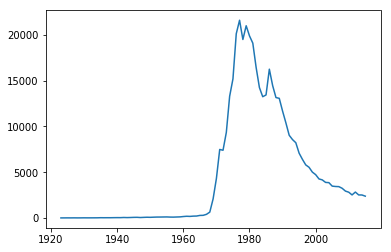

In [26]:
# call the function with values
name_plot('M', 'Jeremy')

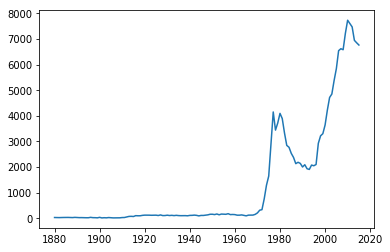

In [27]:
# call the function with a similar name
name_plot('M', 'Jeremiah')

In [28]:
# make the plot bigger
pp.figure(figsize = (18,8))

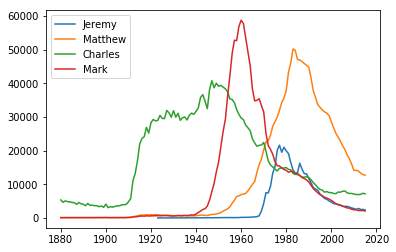

In [29]:
# create a list of names that we want to plot
names = ['Jeremy', 'Matthew', 'Charles', 'Mark']

# iterate through the list with a for loop
for name in names:
    name_plot('M', name)
    
# add a legent
pp.legend(names)

### WordCloud

In [30]:
mpl.rcParams['font.size']=12
mpl.rcParams['savefig.dpi']=100
mpl.rcParams['figure.subplot.bottom']=.1

In [31]:
stopwords = set(STOPWORDS)

In [32]:
data = all_names


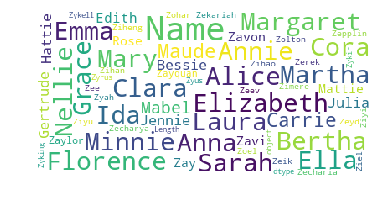

In [44]:
wordcloud = WordCloud(
    background_color ='white',
    stopwords = stopwords,
    max_words = 200,
    max_font_size = 40,
    random_state = 42
    ).generate(str(data['Name']))

print(wordcloud)
fig = pp.figure(1)
pp.imshow(wordcloud)
pp.axis('off')
pp.show()
fig.savefig("word1.png", dpi=900)